In [2]:
f= open(r'avengers_script.txt', encoding="UTF-8-sig")
rawt= f.readlines()
f.close()
rawt[:5]

['##### THE AVENGERS Written by Joss Whedon "And there came a day, a day unlike any other, when Earth\'s mightiest heroes and heroines found themselves united against a common threat. On that day, the Avengers were born--to fight the foes no single superhero could withstand! Through the years, their roster has prospered, changing many times, but their glory has never been denied! Heed the call, then--for now, the Avengers Assemble!" BURNING BLUE FLAMES. A smoky cube shape emerges - THE TESSERACT. Filling the screen with BLACKNESS. CUT TO: Kneeling behind a THRONE, a CLOTHED, ARMORED FIGURE known as THE OTHER, bows.\n',
 'THE OTHER: The Tesseract has awakened. It is on a little world. A human world. They would wield its power,...\n',
 '##### \n',
 'CUT TO: THE OTHER faces a HORNED SHAPED SHADOW. LOKI. Loki is handed the CHITAURI SCEPTER, a long golden handle, fitted with a blue gem encircled with silver blades.\n',
 '##### \n']

In [3]:
chct_lst= []
ln_lst=[]
for i, ele in enumerate(rawt):
    
#     if i<10:
        ele= ele.lower().replace('\n',' ')    
        if '#' not in ele:
            chct= ele.split(':', 1)[0]
            chct_lst.append(chct)
            line= ele.split(':', 1)[1]
            ln_lst.append(line)
# chct_lst
ln_lst

[' the tesseract has awakened. it is on a little world. a human world. they would wield its power,... ',
 ' the other faces a horned shaped shadow. loki. loki is handed the chitauri scepter, a long golden handle, fitted with a blue gem encircled with silver blades. ',
 ' but our ally knows its workings as they never will. he is ready to lead. and our force, our chitauri, will follow. ',
 ' the world will be his. the universe yours. and the humans, what can they do but burn? ',
 ' how bad is it? ',
 " nasa didn't authorize selvig to test phase. ",
 ' what are the energy levels now? ',
 ' how long to get everyone out? ',
 ' do better. ',
 ' we should tell them to go back to sleep? ',
 ' i need you to make sure that phase 2 prototypes are shipped out. ',
 ' until such time as the world ends, we will act as though it intends to spin on. clear out the tech below. every piece of phase 2 on a truck and gone. ',
 ' talk to me, doctor. dr. erik selvig emerges from behind the cms machine, concer

In [4]:
import pandas as pd

In [5]:
dft= pd.concat([pd.DataFrame({'Character': chct_lst}),
                pd.DataFrame({'Line': ln_lst})], axis= 1)
dft.head()

,Character,Line
0,the other,the tesseract has awakened. it is on a little...
1,cut to,the other faces a horned shaped shadow. loki....
2,the other,but our ally knows its workings as they never...
3,the other,the world will be his. the universe yours. an...
4,nick fury,how bad is it?


In [6]:
# name integration
dft['Character'].replace({'iron man': 'tony', 'tony stark': 'tony',
                    'black widow': 'natasha', 
                    'captain america': 'steve', 'steve rogers': 'steve',
                    'hawkeye': 'clint', 'clint barton': 'clint',
                    'bruce': 'banner', 'hulk': 'banner'}, inplace= True)    

In [8]:
from nltk.tokenize import sent_tokenize
import nltk
nltk.download('punkt')
# divide text into sentence list

[nltk_data] Downloading package punkt to C:\Users\hchih...
[nltk_data]   Package punkt is already up-to-date!


True

In [9]:
# tokenize & to string
dft['Line']= dft['Line'].apply(lambda para: ' '.join(sent_tokenize(para)) )
dft.insert(2, column='Line Count', value= dft['Line'].apply(lambda para: len(sent_tokenize(para)) ))
dft.insert(3, column='Word Count', value= dft['Line'].apply(lambda para: len(para.split())))
dft.head()

,Character,Line,Line Count,Word Count
0,the other,the tesseract has awakened. it is on a little...,4,18
1,cut to,the other faces a horned shaped shadow. loki....,3,27
2,the other,but our ally knows its workings as they never...,3,22
3,the other,the world will be his. the universe yours. an...,3,17
4,nick fury,how bad is it?,1,4


In [11]:
from nltk.tokenize import RegexpTokenizer
tknzr= RegexpTokenizer('\w+')

In [ ]:
# stop=set(stopwords.words('english'))
text='  I won\'t just survive, Oh, really...'
tknzr.tokenize(text)
# for i in text.split():
#     if i not in stopwords.words('english'): print(i)
len(text.split())

In [12]:
# remove punctuation
dft['Line']= dft['Line'].apply(lambda x: ' '.join(tknzr.tokenize(x)))
dft.head(5)

,Character,Line,Line Count,Word Count
0,the other,the tesseract has awakened it is on a little w...,4,18
1,cut to,the other faces a horned shaped shadow loki lo...,3,27
2,the other,but our ally knows its workings as they never ...,3,22
3,the other,the world will be his the universe yours and t...,3,17
4,nick fury,how bad is it,1,4


In [13]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\hchih...
[nltk_data]   Package stopwords is already up-to-date!


True

In [14]:
dft['Line']= dft['Line'].apply(lambda para: ' '.join(word for word in para.split() if word not in stopwords.words('english')))
dft.head()

,Character,Line,Line Count,Word Count
0,the other,tesseract awakened little world human world wo...,4,18
1,cut to,faces horned shaped shadow loki loki handed ch...,3,27
2,the other,ally knows workings never ready lead force chi...,3,22
3,the other,world universe humans burn,3,17
4,nick fury,bad,1,4


In [15]:
from nltk.stem.porter import PorterStemmer

# create the instance
stemmer= PorterStemmer()

In [16]:
#stem
dft['Line']= dft['Line'].apply(lambda para: ' '.join(stemmer.stem(word) for word in para.split()))
dft.head()

,Character,Line,Line Count,Word Count
0,the other,tesseract awaken littl world human world would...,4,18
1,cut to,face horn shape shadow loki loki hand chitauri...,3,27
2,the other,alli know work never readi lead forc chitauri ...,3,22
3,the other,world univers human burn,3,17
4,nick fury,bad,1,4


In [17]:
from nltk.sentiment import SentimentIntensityAnalyzer
SIA= SentimentIntensityAnalyzer() 

In [18]:
dft.insert(4, column="Sentiment Score", value= dft['Line'].apply(lambda sent: SIA.polarity_scores(sent)['compound']))
dft.head()

,Character,Line,Line Count,Word Count,Sentiment Score
0,the other,tesseract awaken littl world human world would...,4,18,0.0000
1,cut to,face horn shape shadow loki loki hand chitauri...,3,27,0.6908
2,the other,alli know work never readi lead forc chitauri ...,3,22,0.0000
3,the other,world univers human burn,3,17,0.0000
4,nick fury,bad,1,4,-0.5423


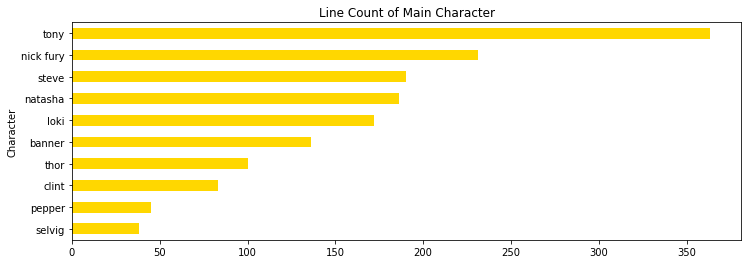

In [34]:
top10ct= dft.groupby('Character')['Line Count'].sum().nlargest(10).index.tolist()
dft[dft['Character'].isin(top10ct)].groupby('Character')['Line Count'].sum().sort_values().plot(kind='barh', title= 'Line Count of Main Character', figsize= (12, 4), color= 'gold')

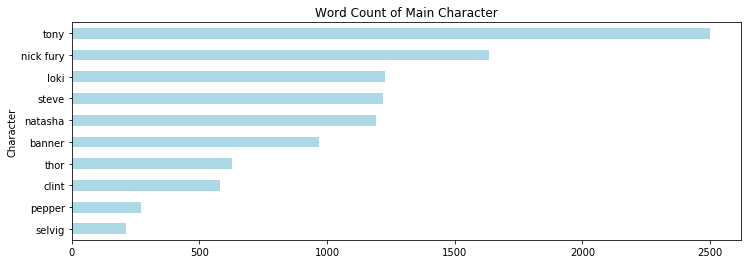

In [36]:
dft[dft['Character'].isin(top10ct)].groupby('Character')['Word Count'].sum().sort_values().head(10).plot(kind='barh', title= 'Word Count of Main Character', figsize= (12, 4), color= 'lightblue')

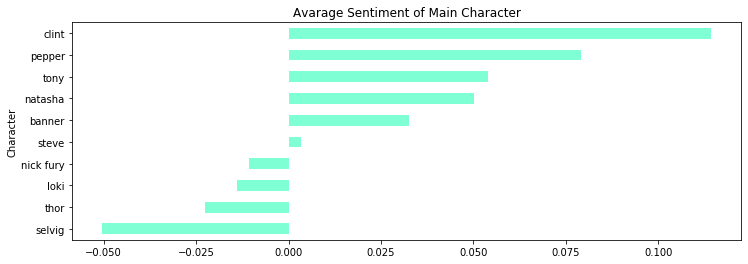

In [29]:
dft[dft['Character'].isin(top10ct)].groupby('Character')['Sentiment Score'].mean().sort_values().plot(kind='barh', title= 'Avarage Sentiment of Main Character', figsize= (12, 4), color= 'aquamarine')